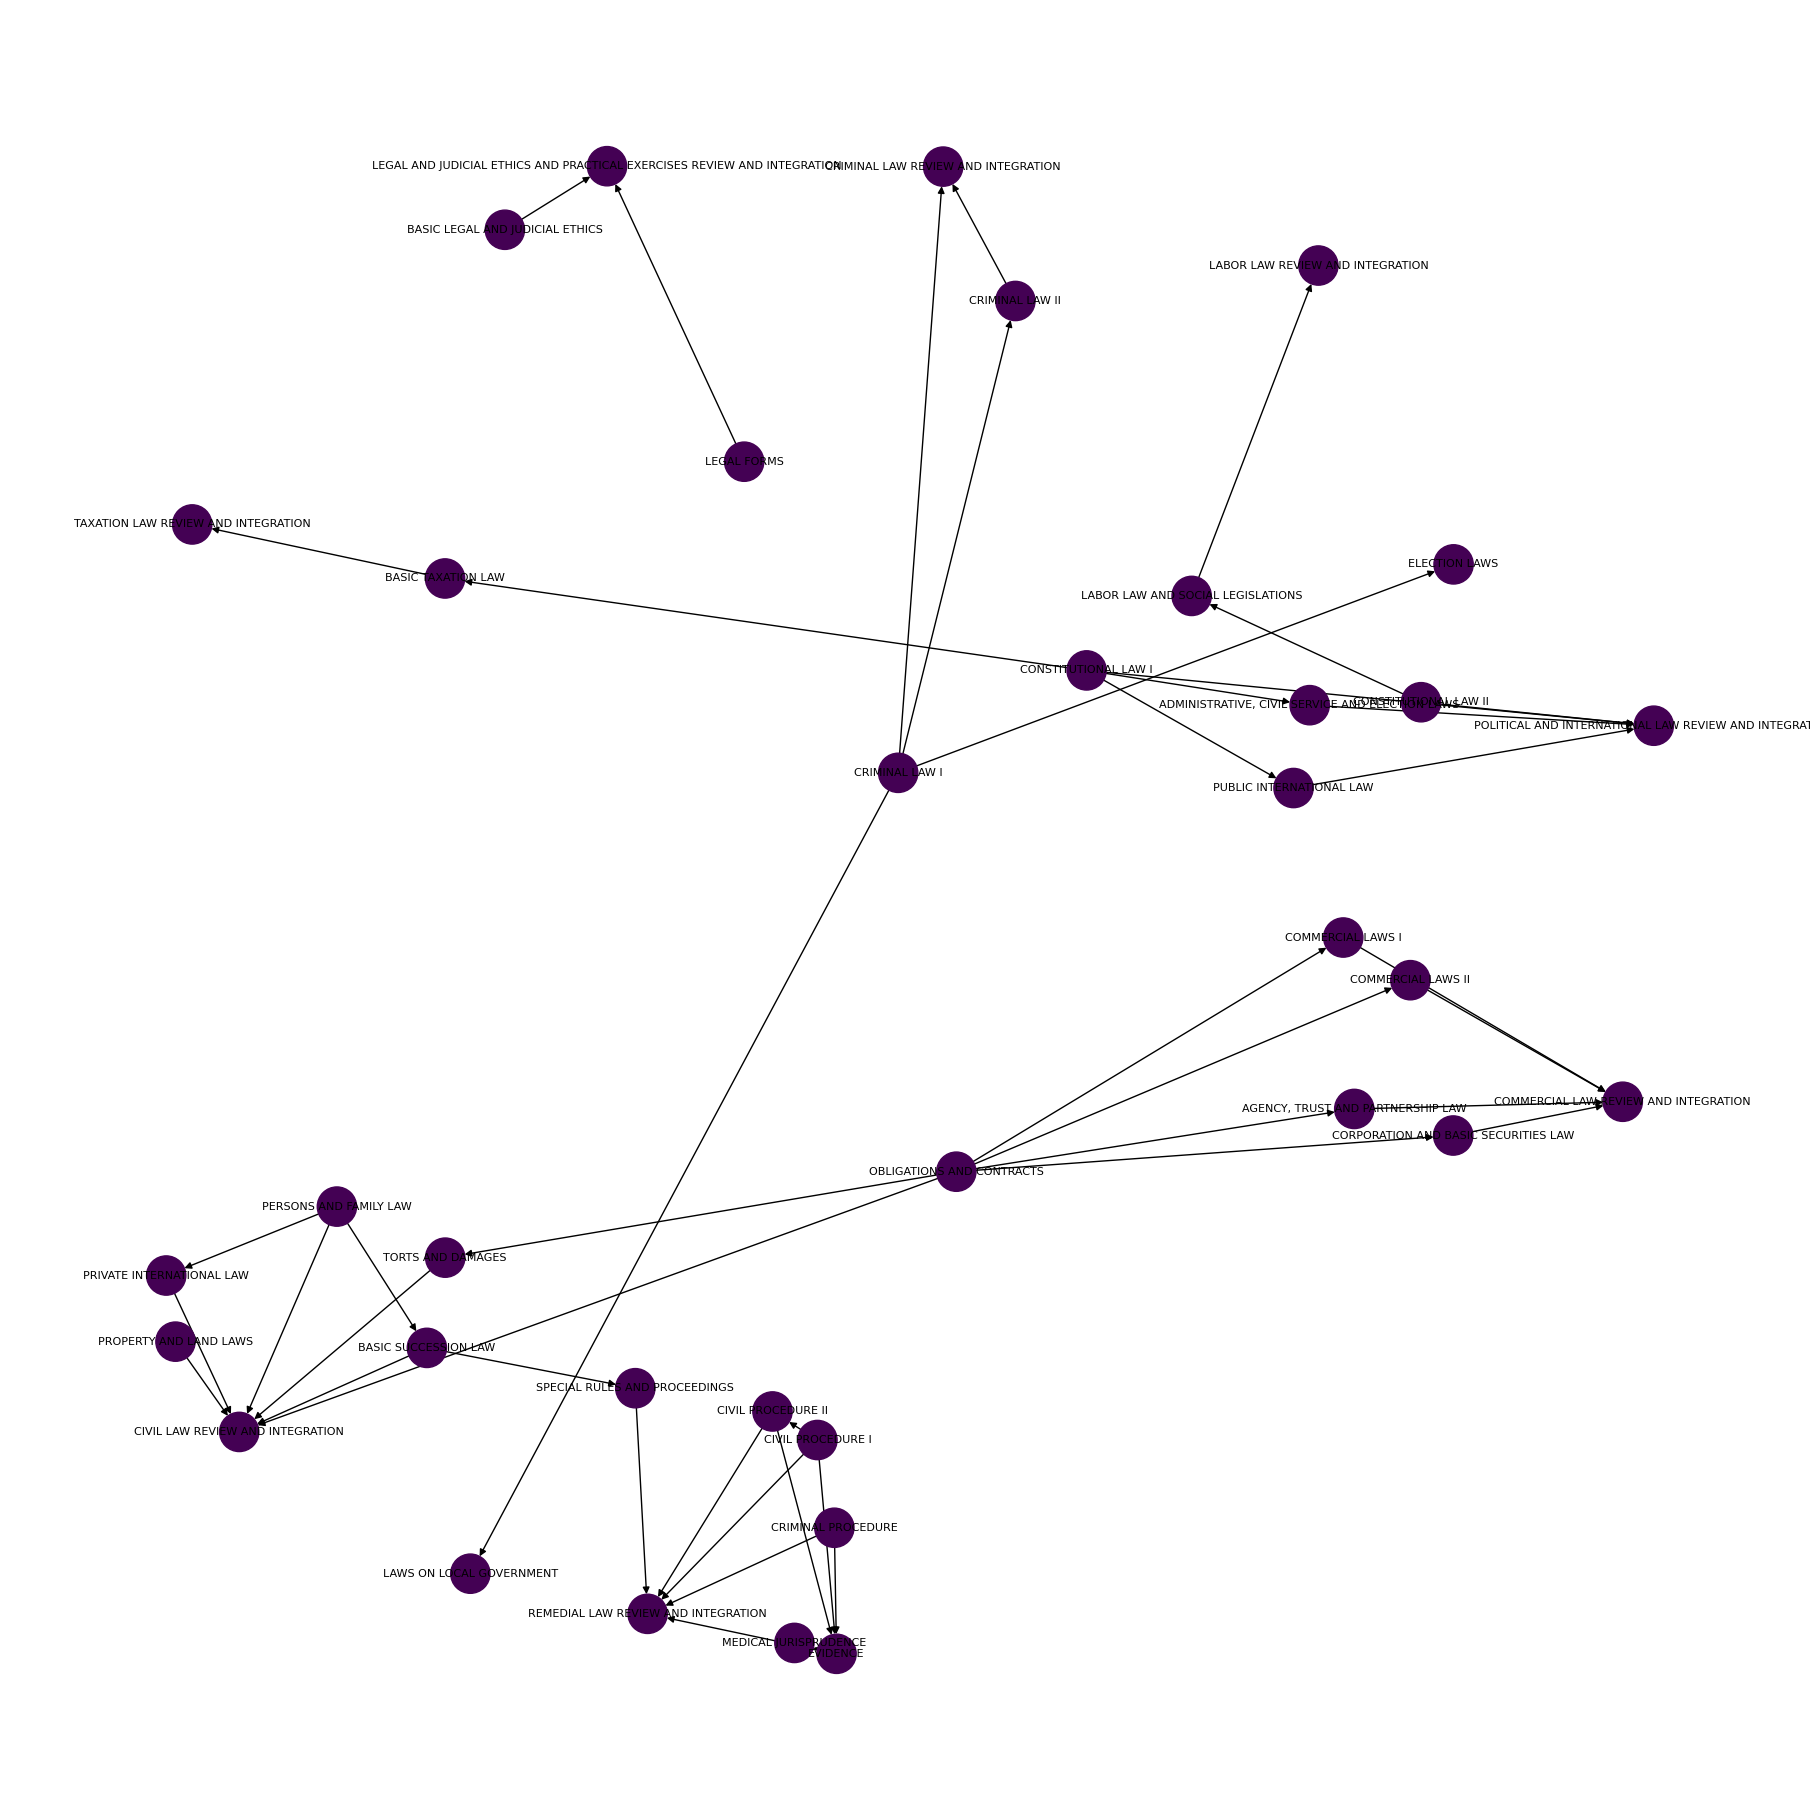

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Load CSV
df = pd.read_csv("CLASSES - Sheet1.csv")

# 2. Create a mapping:
#    "JD 11301" → "CONSTITUTIONAL LAW I"
code_to_desc = df.set_index("Course")["Course Description"].to_dict()

# 3. Directed graph
G = nx.DiGraph()

# 4. Add edges using descriptions
for _, row in df.iterrows():
    course_code = str(row["Course"]).strip()
    course_desc = code_to_desc.get(course_code, course_code)

    reqs = row["Requisite"]
    if pd.isna(reqs):
        continue

    for r in str(reqs).split(","):
        r = r.strip()
        if r:
            req_desc = code_to_desc.get(r, r)
            G.add_edge(req_desc, course_desc)

# 5. Draw graph with descriptions
# Map course -> year level
course_to_year = df.set_index("Course")["Year Level"].to_dict()
colors = [course_to_year.get(node, 0) for node in G.nodes()]

plt.figure(figsize=(18, 18))
pos = nx.spring_layout(G, k=0.6, iterations=100, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    cmap="viridis",
    node_size=800,
    font_size=8,
    arrowsize=10,
)

# plt.tight_layout()
plt.show()



In [4]:
pip install pandas networkx pyvis



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# ==== 1. Load data ====
df = pd.read_csv("CLASSES - Sheet1.csv")

df = df[~df['Course Description'].str.contains('REV')]

# Map course code -> description and year level
code_to_desc = df.set_index("Course")["Course Description"].to_dict()
code_to_year = df.set_index("Course")["Year Level"].to_dict()
code_to_sem = df.set_index("Course")["Semester"].to_dict()

# ==== 2. Build directed graph (using course codes internally) ====
G = nx.DiGraph()

for _, row in df.iterrows():
    course_code = str(row["Course"]).strip()
    reqs = row["Requisite"]

    if pd.isna(reqs):
        continue

    for r in str(reqs).split(","):
        r = r.strip()
        if r:
            G.add_edge(r, course_code)   # prerequisite -> course

# ==== 3. Create interactive pyvis network ====
net = Network(height="750px", width="100%", directed=True, notebook=False)
net.barnes_hut()   # nicer layout

net.set_options("""
{
  "edges": {
    "arrows": {
      "to": {
        "enabled": true,
        "scaleFactor": 1.0
      }
    },
    "width": 1
  }
}
""")



# Add nodes with DESCRIPTION as label
for node in G.nodes():
    desc = code_to_desc.get(node, node)
    year = code_to_year.get(node, "")
    
    # Color by year level (optional)
    # Year–Sem color mapping
    color_map = {
        (1, 1): "#1B5E20",  # Year 1 Sem 1 - Dark Green
        (1, 2): "#81C784",  # Year 1 Sem 2 - Light Green

        (2, 1): "#1565C0",  # Year 2 Sem 1 - Dark Blue
        (2, 2): "#64B5F6",  # Year 2 Sem 2 - Light Blue

        (3, 1): "#E65100",  # Year 3 Sem 1 - Dark Orange
        (3, 2): "#FFB74D",  # Year 3 Sem 2 - Light Orange

        (4, 1): "#B71C1C",  # Year 4 Sem 1 - Dark Red
        (4, 2): "#E57373",  # Year 4 Sem 2 - Light Red
    }


    year = int(code_to_year.get(node, 0))
    sem = int(code_to_sem.get(node, 0))

    color = color_map.get((year, sem), "#D3D3D3")  # fallback gray

    net.add_node(
        node,
        label=desc,
        title=f"{node} - {desc} (Year {year})",
        color=color,
        size=30,               # 🔵 increase node size
        font={"size":15}      # 🔤 increase label size
    )


# Add edges
for src, dst in G.edges():
    net.add_edge(src, dst, width=1, arrows={'to': {'scaleFactor': 1}})


# ==== 4. Generate HTML file ====
net.save_graph("classes_prereq_graph.html")
print("Saved to classes_prereq_graph.html")

Saved to classes_prereq_graph.html


In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# ==== 1. Load data ====
df = pd.read_csv("CLASSES - Sheet1.csv")

# df = df[~df['Course Description'].str.contains('REV')]

# Map course code -> description and year level
code_to_desc = df.set_index("Course")["Course Description"].to_dict()
code_to_year = df.set_index("Course")["Year Level"].to_dict()
code_to_sem = df.set_index("Course")["Semester"].to_dict()

# ==== 2. Build directed graph (using course codes internally) ====
G = nx.DiGraph()

# Add ALL courses as floating nodes first
for _, row in df.iterrows():
    course_code = str(row["Course"]).strip()
    desc = code_to_desc.get(course_code, course_code)
    year = int(code_to_year.get(course_code, 0))
    sem  = int(code_to_sem.get(course_code, 0))

    color = color_map.get((year, sem), "#D3D3D3")

    net.add_node(
        course_code,
        label=desc,
        title=f"{course_code} - {desc} (Year {year} Sem {sem})",
        color=color,
        size=35,
        font={"size": 28}
    )


# ==== 3. Create interactive pyvis network ====
net = Network(height="750px", width="100%", directed=True, notebook=False)
net.barnes_hut()   # nicer layout

net.set_options("""
{
  "edges": {
    "arrows": {
      "to": {
        "enabled": true,
        "scaleFactor": 1.0
      }
    },
    "width": 1
  }
}
""")



# Add nodes with DESCRIPTION as label
for node in G.nodes():
    desc = code_to_desc.get(node, node)
    year = code_to_year.get(node, "")
    
    # Color by year level (optional)
    # Year–Sem color mapping
    color_map = {
        (1, 1): "#1B5E20",  # Year 1 Sem 1 - Dark Green
        (1, 2): "#81C784",  # Year 1 Sem 2 - Light Green

        (2, 1): "#1565C0",  # Year 2 Sem 1 - Dark Blue
        (2, 2): "#64B5F6",  # Year 2 Sem 2 - Light Blue

        (3, 1): "#E65100",  # Year 3 Sem 1 - Dark Orange
        (3, 2): "#FFB74D",  # Year 3 Sem 2 - Light Orange

        (4, 1): "#B71C1C",  # Year 4 Sem 1 - Dark Red
        (4, 2): "#E57373",  # Year 4 Sem 2 - Light Red
    }


    year = int(code_to_year.get(node, 0))
    sem = int(code_to_sem.get(node, 0))

    color = color_map.get((year, sem), "#D3D3D3")  # fallback gray

    net.add_node(
        node,
        label=desc,
        title=f"{node} - {desc} (Year {year})",
        color=color,
        size=30,               # 🔵 increase node size
        font={"size":15}      # 🔤 increase label size
    )


# Add edges
for src, dst in G.edges():
    net.add_edge(src, dst, width=1, arrows={'to': {'scaleFactor': 1}})


# ==== 4. Generate HTML file ====
net.save_graph("classes_prereq_graph_w_review.html")
print("Saved to classes_prereq_graph.html")

Saved to classes_prereq_graph.html
